In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np

In [2]:
# Let's see our images and what they look like
img = image.load_img("train/Ayodele/3.jpg")

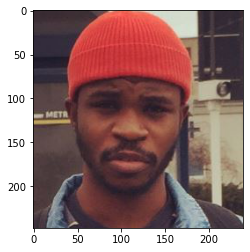

In [3]:
plt.imshow(img)

In [4]:
# the 3 dimensional structure of the picture in an array
cv2.imread("train/Ayodele/17.jpg")

array([[[152, 189, 227],
        [152, 189, 227],
        [152, 189, 227],
        ...,
        [135, 159, 195],
        [135, 159, 195],
        [135, 159, 195]],

       [[152, 189, 227],
        [152, 189, 227],
        [152, 189, 227],
        ...,
        [135, 159, 195],
        [135, 159, 195],
        [135, 159, 195]],

       [[152, 189, 227],
        [152, 189, 227],
        [152, 189, 227],
        ...,
        [135, 159, 195],
        [135, 159, 195],
        [135, 159, 195]],

       ...,

       [[ 81,  86, 149],
        [ 82,  89, 152],
        [ 81,  86, 149],
        ...,
        [ 62,  61,  87],
        [ 81,  78, 104],
        [ 79,  78, 104]],

       [[ 78,  85, 148],
        [ 82,  89, 152],
        [ 80,  87, 150],
        ...,
        [ 83,  84, 110],
        [ 91,  90, 116],
        [ 89,  90, 116]],

       [[ 74,  83, 146],
        [ 79,  88, 151],
        [ 78,  87, 150],
        ...,
        [ 89,  93, 118],
        [ 86,  87, 113],
        [ 84,  88, 113]]

In [5]:
# shape of the image can be found by
cv2.imread("train/Ayodele/3.jpg").shape

(248, 239, 3)

In [6]:
# we want the rgb values in the array to range from 0 - 1 instead of 1 - 255
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [35]:
# train dataset from our directory, batch size is 3 because our dataset isn't huge
train_dataset = train.flow_from_directory("train/", 
                                         target_size = (100,100),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory("validation/", 
                                         target_size = (100,100),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 36 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [8]:
# to see the labels of our classified images
train_dataset.class_indices

{'Ayodele': 0, 'Olabisi': 1}

In [36]:
# Defining our model with keras
# Layers are given in form of list.. so here we have 6 neural layers for our model
# we use convolution layer with Conv2D
# 16 is the the number of filters in the first layer
# (3,3) is the size of the filter
# 'relu' is the activation function
# and (200, 200, 3) is the target size we specified above and 3 represents r,g,b 
# and sigmoid in the lat layer because we have a binary classifier i.e Ayodele and Olabisi
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100,100, 3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])

In [37]:
# let's compile our model 
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.01),
             metrics = ['accuracy']
             )

In [40]:
# let's fit the model 
model_fit = model.fit(train_dataset, 
                     steps_per_epoch = 3,
                     epochs = 50,
                     validation_data = validation_dataset)

Epoch 1/50
3/3 [==============================] - 0s 49ms/step - loss: 0.6824 - accuracy: 0.5556 - val_loss: 0.7082 - val_accuracy: 0.4286
Epoch 2/50
3/3 [==============================] - 0s 42ms/step - loss: 0.6941 - accuracy: 0.5556 - val_loss: 0.7094 - val_accuracy: 0.4286
Epoch 3/50
3/3 [==============================] - 0s 42ms/step - loss: 0.6686 - accuracy: 0.5556 - val_loss: 0.7481 - val_accuracy: 0.4286
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 1.6361 - accuracy: 0.5556 - val_loss: 1.1948 - val_accuracy: 0.5714
Epoch 5/50
3/3 [==============================] - 0s 42ms/step - loss: 1.4670 - accuracy: 0.4444 - val_loss: 0.6934 - val_accuracy: 0.4286
Epoch 6/50
3/3 [==============================] - 0s 44ms/step - loss: 0.6494 - accuracy: 0.8889 - val_loss: 0.7130 - val_accuracy: 0.4286
Epoch 7/50
3/3 [==============================] - 0s 41ms/step - loss: 0.7125 - accuracy: 0.3333 - val_loss: 0.6804 - val_accuracy: 0.8571
Epoch 8/50
3/3 [===========

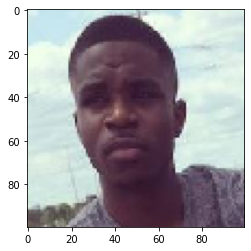

This is Ayodele


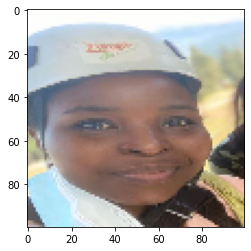

This is Olabisi


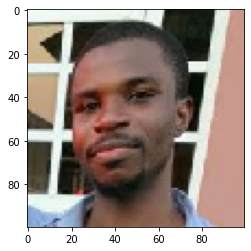

This is Ayodele


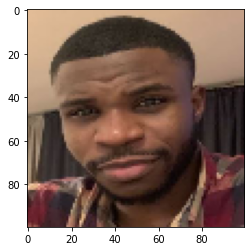

This is Ayodele


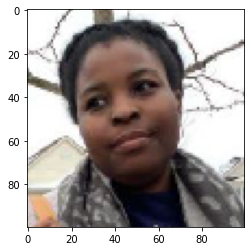

This is Ayodele


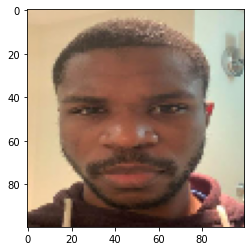

This is Ayodele


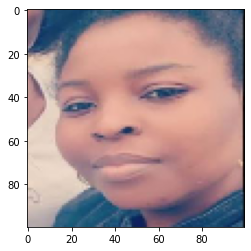

This is Ayodele


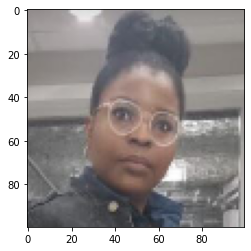

This is Olabisi


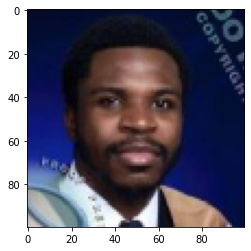

This is Ayodele


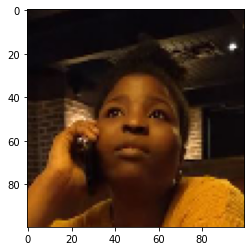

This is Ayodele


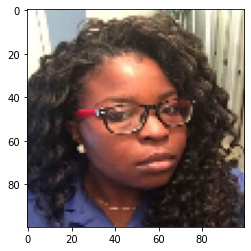

This is Olabisi


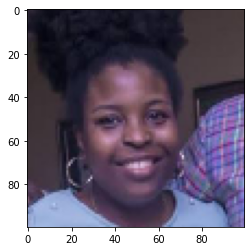

This is Ayodele


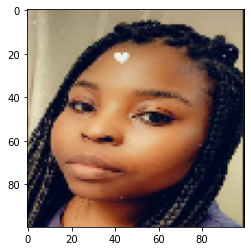

This is Ayodele


In [41]:
# test our model with the test data gathered
dir_path = 'testing/'

for file in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, file), target_size = (100, 100))
    plt.imshow(img)
    plt.show()
    
    # convert image to array to test them
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    
    if val == 0:
        print("This is Ayodele")
    else:
        print("This is Olabisi")
    